Autor: Alejandro Burgueño Díaz. 03/11/2021.

# 0 - LIBRERÍAS Y ANÁLISIS DEL DATASET

In [1]:
# Importación de librerías generales
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from dtreeviz.trees import *
from IPython.core.display import display, HTML

# Lectura del dataset
iris = pd.read_csv('iris.csv')

In [3]:
# Comprobación del dataset (tabla del dataframe)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


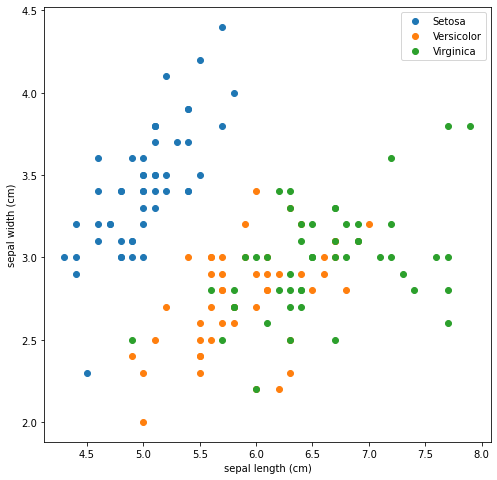

In [4]:
# Comprobación del dataset (gráfica de las distintas clases y un par de variables a elegir)
plt.rcParams['figure.figsize'] = [8, 8]

groups = iris.groupby('variety')
for name, group in groups:
    plt.scatter(group['sepal.length'], group['sepal.width'], label=name)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

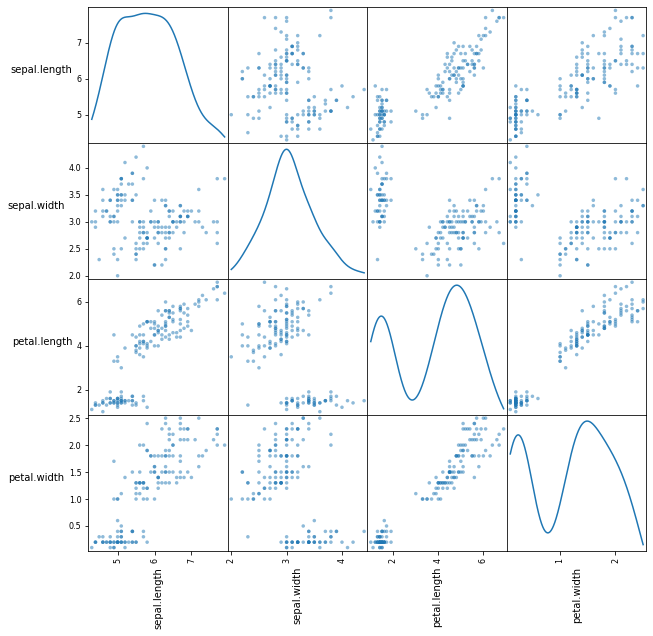

In [5]:
# Matriz de dispersión (scatter) y pares de variables
scatter_matrix = pd.plotting.scatter_matrix(
    iris,
    figsize  = [10, 10],
    marker   = ".",
    s        = 50,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0, ha='right')   

OBSERVACIÓN: Se aprecia que la agrupación de casos es homogénea en cuanto a la longitud y anchura del sépalo se refiere, centrándose en un pico central con dos colas proporcionadas a ambos lados. Este comportamiento es similar a las curvas gaussianas (datos balanceados).  
En cuanto a las dimensiones del pétalo (ancho y largo) se reflejan dos agrupaciones principales de datos (dos clústeres), que serían fácilmente reconocibles a través de métodos de aprendizaje no supervisado como K-means o Mean shift (aunque no es el objetivo de la actividad)

<AxesSubplot:>

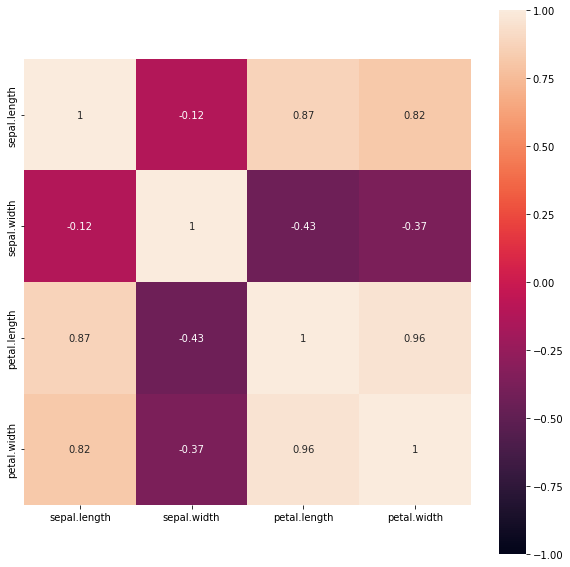

In [6]:
# Matriz de correlación
corrMatrix = iris.corr()

plt.rcParams['figure.figsize'] = 10, 10
data = np.round(corrMatrix, 2)
sb.heatmap(data, annot = True, vmin=-1, vmax=1, square=True) 

OBSERVACIÓN: Los pares de variables próximos a 1 muestran una alta correlación, lo que implica que, por ejemplo, la longitud y ancho del pétalo están muy relacionados (se deduce que generalmente el área de los pétalos crece en proporción, ya que cuando una dimensión es mayor también lo es la otra y viceversa).
Las correlaciones negativas, si bien no son próximas a -1, implican, por el contrario, una relación inversa.

# 1 - CLASIFICADORES Y MÉTRICAS

## Preprocesado de datos y funciones ( prueba sin validar ni buscar primero)

In [2]:
# Se aislan las variables de entrada 'X' de la variable predictiva 'y'
X = iris.drop('variety', axis=1)     # Variables 'X', todas menos la etiqueta 'variedad'
y = iris['variety']                  # Variable 'y', la etiqueta 'variedad'

In [3]:
# Se aislan las variables de entrada 'X' de la variable predictiva 'y'
X = iris.drop('variety', axis=1)     # Variables 'X', todas menos la etiqueta 'variedad'
y = iris['variety']                  # Variable 'y', la etiqueta 'variedad'

# Se convierten las variables a numpy para posteriormente poder aplicar reshape y adaptar su dimensión
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# Para entrenar los modelos de clasificación es preciso codificar las strings de etiquetas a números
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

# Finalmente, para evitar overfitting se dividen el conjunto de datos en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [79]:
def metricas ():
    print("-----------------------------------------------------")
    # print('Score:', clf.score(y_pred, y_test))
    print('Accuracy:',metrics.accuracy_score(y_pred, y_test))
    print('F1 Macro:', metrics.f1_score(y_pred, y_test, average='macro'))
    print("-----------------------------------------------------")

    print("REAL")
    print(metrics.confusion_matrix(y_pred, y_test))
    print("   PREDICT")
    
    print("-----------------------------------------------------")
    print('Report:')
    print(metrics.classification_report(y_pred, y_test))

In [80]:
print("RANDOM FOREST")
clf = RandomForestClassifier(max_depth=20, n_estimators = 900, criterion = 'gini', random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

RANDOM FOREST
-----------------------------------------------------
Accuracy: 0.9466666666666667
F1 Macro: 0.9495091164095372
-----------------------------------------------------
REAL
[[21  0  0]
 [ 0 29  3]
 [ 0  1 21]]
   PREDICT
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.91      0.94        32
           2       0.88      0.95      0.91        22

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



## Pruebas de Cross Validation

In [4]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=20, n_estimators = 900, criterion = 'gini', random_state=3)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(scores)
# La desviación estándar es la menor de las diferencias de los scores y la media de scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
0.97 accuracy with a standard deviation of 0.02


In [85]:
from sklearn.model_selection import cross_validate
clf = RandomForestClassifier(max_depth=20, n_estimators = 900, criterion = 'gini', random_state=0)
scores = cross_validate(clf, X, y, cv=5, scoring='accuracy')
scores

{'fit_time': array([1.85848522, 1.84955406, 1.8481195 , 1.87314796, 1.86843681]),
 'score_time': array([0.14059925, 0.12498832, 0.12557793, 0.12924409, 0.16114974]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

## Pruebas de Search Hyperparameters

In [101]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameters = {'max_depth':[1, 20], 'n_estimators':[1, 200]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 20], 'n_estimators': [1, 200]})

In [106]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [107]:
clf.cv_results_

{'mean_fit_time': array([0.00675578, 0.4087769 , 0.        , 0.40923362]),
 'std_fit_time': array([0.00223976, 0.00652743, 0.        , 0.0045661 ]),
 'mean_score_time': array([0.00041251, 0.02814331, 0.        , 0.03184862]),
 'std_score_time': array([0.0005069 , 0.00625909, 0.        , 0.00116759]),
 'param_max_depth': masked_array(data=[1, 1, 20, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[1, 200, 1, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 1},
  {'max_depth': 1, 'n_estimators': 200},
  {'max_depth': 20, 'n_estimators': 1},
  {'max_depth': 20, 'n_estimators': 200}],
 'split0_test_score': array([0.63333333, 0.93333333, 0.93333333, 0.96666667]),
 'split1_test_score': array([0.66666667, 0.96666667, 0.86666667, 0.96666667]),
 'split2_test_score': array([0.66666667, 0.9       ,

In [109]:
clf.cv_results_['params']

[{'max_depth': 1, 'n_estimators': 1},
 {'max_depth': 1, 'n_estimators': 200},
 {'max_depth': 20, 'n_estimators': 1},
 {'max_depth': 20, 'n_estimators': 200}]

In [111]:
# Obtención del mejor modelo:
clf.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200)

### Otra prueba de grid search con un rango más limitado:

In [117]:
parameters = {'criterion':('gini', 'entropy'),
              'max_depth':[1, 20], 
              'n_estimators':[1, 200, 900]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [1, 20],
                         'n_estimators': [1, 200, 900]})

In [86]:
# Obtención del mejor modelo:
clf.best_estimator_

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [119]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=20, n_estimators = 200, criterion = 'gini', random_state=3)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(scores)
# La desviación estándar es la menor de las diferencias de los scores y la media de scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96 accuracy with a standard deviation of 0.02


# GENERAR CROSS VALIDATION PROPIO

# La idea es generar los K-folds del dataframe, para después poder hacer un loop aplicando un modelo personalizado (ejemplo, finetuning)

## Cross Validation personalizado con dataframe de prueba

In [82]:
import pandas as pd
import statistics
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [40]:
df = pd.DataFrame()  
numeros = [1,2,3,4,5,6,7,8,9]
ids = [12,13,54,23,86,34,53,83,98]
nombres = ['a','b','c','d','e','f','g','h','i']
df['numeros'] = numeros
df['ids']= ids
df['nombres'] = nombres

In [41]:
df

,numeros,ids,nombres
0,1,12,a
1,2,13,b
2,3,54,c
3,4,23,d
4,5,86,e
5,6,34,f
6,7,53,g
7,8,83,h
8,9,98,i


In [42]:
# Mezcla las filas
shuffled = df.sample(frac=1)

# Genera subdivisiones
result = np.array_split(shuffled, 5) 

In [69]:
for chunk in range(len(result)):
    train = result[chunk]
    test = (pd.merge(df,result[chunk], indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))
    
    X_train = np.array(train['numeros']).reshape(-1, 1)
    y_train = np.array(train['ids'])
    
    X_test = np.array(test['numeros']).reshape(-1, 1)
    y_test = np.array(test['ids'])
    
    
    clf = RandomForestClassifier(max_depth=10, criterion = 'gini', random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Accuracy:',metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0


## Cross Validation personalizado con dataframe iris

In [71]:
# Lectura del dataset
iris = pd.read_csv('iris.csv')

In [73]:
# Para entrenar los modelos de clasificación es preciso codificar las strings de etiquetas a números
le = preprocessing.LabelEncoder()
le.fit(iris['variety'])
iris['variety'] = le.transform(iris['variety'])

In [75]:
# Mezcla las filas
shuffled = iris.sample(frac=1)

# Genera subdivisiones
result = np.array_split(shuffled, 5) 

In [85]:
accuracy_list = []

for chunk in range(len(result)):
    train = result[chunk]
    test = (pd.merge(iris,result[chunk], indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))
    
    X_train = np.array(train[['sepal.length','sepal.width','petal.length','petal.width']])
    y_train = np.array(train['variety'])
    
    X_test = np.array(test[['sepal.length','sepal.width','petal.length','petal.width']])
    y_test = np.array(test['variety'])
    
    
    clf = RandomForestClassifier(max_depth=10, criterion = 'gini', random_state=0)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_pred, y_test)
    
    print('Accuracy:', score)
    accuracy_list.append(score)
    
print("La media de Accuracy es: ", statistics.mean(accuracy_list))

Accuracy: 0.9411764705882353
Accuracy: 0.95
Accuracy: 0.95
Accuracy: 0.9166666666666666
Accuracy: 0.9327731092436975
La media de Accuracy es:  0.9381232492997199
